# Preprocessing Gempa Bumi

Anggota:
- Ahmad Danindra Nugroho (5025211259)
- Muhammad Ghifari Taqiuddin (5025211063)
- Raihan Farid (5025201141)
- Talitha Hayyinas Sahala (5025211263)

# Preparations

In [1]:
# Installing dependencies
# Only run once
%pip install gnews nlp-id PySastrawi pillow matplotlib numpy wordcloud pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import all dependencies
from nlp_id import tokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import os

In [3]:
# Directory for all related files
dataset_dir = 'filtered/'
os.makedirs(dataset_dir, exist_ok=True)

In [4]:
os.listdir(dataset_dir)

['Kecelakaan.csv', 'Kebakaran.csv', 'Gempa Bumi.csv', 'Banjir.csv']

## Loading Dataset

In [5]:
df = pd.read_csv(os.path.join(dataset_dir, 'Gempa Bumi.csv'))
df.head()

,title
0,5 Meteor yang Pernah Jatuh di Indonesia kump...
1,"Mitos Purnama Picu Gempa, Ini Kata Peneliti Ha..."
2,"Gempa Banten, Belasan Orang di Bogor Luka luka"
3,Cerita warga Rangkasbitung selamatkan diri dar...
4,"Gempa Bikin 1 Rumah Rusak di Jagakarsa, 1 Oran..."


## Preprocessing

1. Casefolding: mengubah semua karakter huruf ke huruf kecil
2. Stemming: mengubah suatu kata menjadi bentuk dasarnya (mengatakan -> kata)
3. Tokenization: memecah kalimat menjadi beberapa token
4. Stopwords Removal: memfilter kata yang sering muncul tapi tidak berpengaruh dalam pemrosesan (tergantung umumnya konjungsi, preposisi, pronomina, dsb.)

In [6]:
# 1. Casefolding
df['title'] = df['title'].str.lower()
df.head()

,title
0,5 meteor yang pernah jatuh di indonesia kump...
1,"mitos purnama picu gempa, ini kata peneliti ha..."
2,"gempa banten, belasan orang di bogor luka luka"
3,cerita warga rangkasbitung selamatkan diri dar...
4,"gempa bikin 1 rumah rusak di jagakarsa, 1 oran..."


In [7]:
# # 2. Stemming
# # Menggunakan stemmer dari library PySastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['stem'] = df['title'].apply(stemmer.stem)
df.head()

,title,stem
0,5 meteor yang pernah jatuh di indonesia kump...,5 meteor yang pernah jatuh di indonesia kumpar...
1,"mitos purnama picu gempa, ini kata peneliti ha...",mitos purnama picu gempa ini kata teliti halam...
2,"gempa banten, belasan orang di bogor luka luka",gempa banten bas orang di bogor luka luka
3,cerita warga rangkasbitung selamatkan diri dar...,cerita warga rangkasbitung selamat diri dari g...
4,"gempa bikin 1 rumah rusak di jagakarsa, 1 oran...",gempa bikin 1 rumah rusak di jagakarsa 1 orang...


In [13]:
# 3. Tokenization
# Menggunakan tokenizer dari library nlp-id
tok = tokenizer.Tokenizer()

df['tokens'] = df['stem'].apply(tok.tokenize)
df.head()

,title,stem,tokens
0,5 meteor yang pernah jatuh di indonesia kump...,5 meteor yang pernah jatuh di indonesia kumpar...,"[5, meteor, yang, pernah, jatuh, di, indonesia..."
1,"mitos purnama picu gempa, ini kata peneliti ha...",mitos purnama picu gempa ini kata teliti halam...,"[mitos, purnama, picu, gempa, ini, kata, telit..."
2,"gempa banten, belasan orang di bogor luka luka",gempa banten bas orang di bogor luka luka,"[gempa, banten, bas, orang, di, bogor, luka, l..."
3,cerita warga rangkasbitung selamatkan diri dar...,cerita warga rangkasbitung selamat diri dari g...,"[cerita, warga, rangkasbitung, selamat, diri, ..."
4,"gempa bikin 1 rumah rusak di jagakarsa, 1 oran...",gempa bikin 1 rumah rusak di jagakarsa 1 orang...,"[gempa, bikin, 1, rumah, rusak, di, jagakarsa,..."


In [14]:
# 4. Stopwords removal
# Menggunakan list stopwords dari library nltk
list_stopwords = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in list_stopwords]

df['tokens_clean'] = df['tokens'].apply(remove_stopwords)
df.head()

,title,stem,tokens,tokens_clean
0,5 meteor yang pernah jatuh di indonesia kump...,5 meteor yang pernah jatuh di indonesia kumpar...,"[5, meteor, yang, pernah, jatuh, di, indonesia...","[5, meteor, jatuh, indonesia, kumpar, com]"
1,"mitos purnama picu gempa, ini kata peneliti ha...",mitos purnama picu gempa ini kata teliti halam...,"[mitos, purnama, picu, gempa, ini, kata, telit...","[mitos, purnama, picu, gempa, teliti, halaman,..."
2,"gempa banten, belasan orang di bogor luka luka",gempa banten bas orang di bogor luka luka,"[gempa, banten, bas, orang, di, bogor, luka, l...","[gempa, banten, bas, orang, bogor, luka, luka]"
3,cerita warga rangkasbitung selamatkan diri dar...,cerita warga rangkasbitung selamat diri dari g...,"[cerita, warga, rangkasbitung, selamat, diri, ...","[cerita, warga, rangkasbitung, selamat, gempa,..."
4,"gempa bikin 1 rumah rusak di jagakarsa, 1 oran...",gempa bikin 1 rumah rusak di jagakarsa 1 orang...,"[gempa, bikin, 1, rumah, rusak, di, jagakarsa,...","[gempa, bikin, 1, rumah, rusak, jagakarsa, 1, ..."


In [15]:
# Gabungkan kembali token pada kolom 'tokens_clean'
df['merged'] = df['tokens_clean'].apply(lambda token: ' '.join(token))
df.head()

,title,stem,tokens,tokens_clean,merged
0,5 meteor yang pernah jatuh di indonesia kump...,5 meteor yang pernah jatuh di indonesia kumpar...,"[5, meteor, yang, pernah, jatuh, di, indonesia...","[5, meteor, jatuh, indonesia, kumpar, com]",5 meteor jatuh indonesia kumpar com
1,"mitos purnama picu gempa, ini kata peneliti ha...",mitos purnama picu gempa ini kata teliti halam...,"[mitos, purnama, picu, gempa, ini, kata, telit...","[mitos, purnama, picu, gempa, teliti, halaman,...",mitos purnama picu gempa teliti halaman all ko...
2,"gempa banten, belasan orang di bogor luka luka",gempa banten bas orang di bogor luka luka,"[gempa, banten, bas, orang, di, bogor, luka, l...","[gempa, banten, bas, orang, bogor, luka, luka]",gempa banten bas orang bogor luka luka
3,cerita warga rangkasbitung selamatkan diri dar...,cerita warga rangkasbitung selamat diri dari g...,"[cerita, warga, rangkasbitung, selamat, diri, ...","[cerita, warga, rangkasbitung, selamat, gempa,...",cerita warga rangkasbitung selamat gempa lebak
4,"gempa bikin 1 rumah rusak di jagakarsa, 1 oran...",gempa bikin 1 rumah rusak di jagakarsa 1 orang...,"[gempa, bikin, 1, rumah, rusak, di, jagakarsa,...","[gempa, bikin, 1, rumah, rusak, jagakarsa, 1, ...",gempa bikin 1 rumah rusak jagakarsa 1 orang luka


In [53]:
df[df['stem'].str.contains('biasa')]

,title,stem,tokens,tokens_clean,merged


In [47]:
keywords = '|'.join(['trik', 'biasa', 'langkah', 'lagu', 'tampak', 'ajar', 'film', 'kenang', 'ilmuwan', 'siswa',  ])
df = df[~df['title'].str.contains(keywords)].reset_index(drop=True)

In [48]:
# Mengecek jumlah data dalam DataFrame
jumlah_data = df.shape[0]
print("Jumlah data dalam DataFrame adalah:", jumlah_data)

Jumlah data dalam DataFrame adalah: 2268


## Visualisasi WordCloud

Pembanding data antara sebelum dan setelah dilakukan pra-pemrosesan

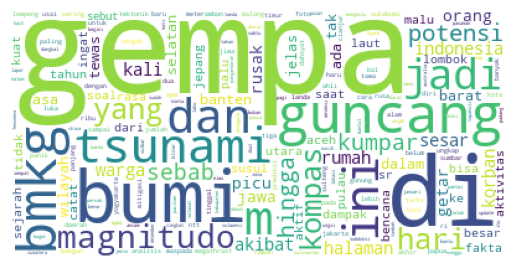

In [54]:
text_before = ' '.join(df['stem'].tolist())
wordcloud_before = WordCloud(background_color='white', collocations=False).generate(text_before)

plt.imshow(wordcloud_before)
plt.axis("off")
plt.show()

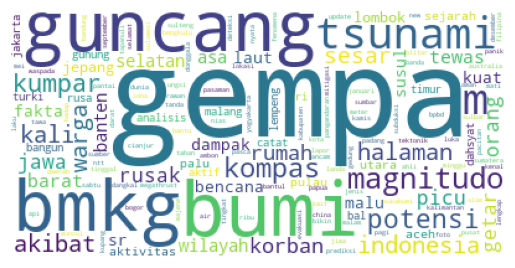

In [55]:
text_after = ' '.join(df['merged'])
wordcloud_after = WordCloud(background_color='white', collocations=False).generate(text_after)

plt.imshow(wordcloud_after)
plt.axis("off")
plt.show()

In [56]:
# Simpan output ke dalam CSV
df.to_csv('Gempa Bumi-2018-2023-pre.csv', index=False)